# Programowanie w języku Python - zadanie 4
Antoni Karwowski 229809
Michał Gebel 229879

In [198]:
from itertools import combinations

import matplotlib.pyplot as plt
from pandas import read_csv, MultiIndex, DataFrame
from seaborn import heatmap, regplot
from tabulate import tabulate

data = read_csv("data.csv",
                   header=None,
                   names=["plec", "dlugosc", "srednica", "wysokosc",
                          "masa_calkowita", "masa_po_wyjeciu",
                          "masa_trzewi", "masa_muszli", "pierscienie"])

data_without_sexes = data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]
def percent(number):
    return round(number * 100, 2)

def print_table(table):
    print(tabulate(table, headers='keys', tablefmt='fancy_grid'))

# Ocena dostateczna 1

In [199]:
print_table({'': data.groupby("plec").groups,
 'count': data.groupby("plec").size(),
 '%': [percent(i / len(data)) for i in data.groupby('plec').size()]
 })

╒════╤═════════╤═══════╕
│    │   count │     % │
╞════╪═════════╪═══════╡
│ F  │    1307 │ 31.29 │
├────┼─────────┼───────┤
│ I  │    1342 │ 32.13 │
├────┼─────────┼───────┤
│ M  │    1528 │ 36.58 │
╘════╧═════════╧═══════╛


# Ocena dostateczna 2

In [200]:
print_table(data_without_sexes.describe().drop("count").transpose()) # xD top
# print_table({
#     '': data_without_sexes.columns,
#     'mean': [data_without_sexes[column].mean() for column in data_without_sexes.columns],
#     'std': [data_without_sexes[column].std() for column in data_without_sexes.columns],
#     'min': [data_without_sexes[column].min() for column in data_without_sexes.columns],
#     '25%': [data_without_sexes[column].quantile(0.25) for column in data_without_sexes.columns],
#     '50%': [data_without_sexes[column].quantile(0.5) for column in data_without_sexes.columns],
#     '75%': [data_without_sexes[column].quantile(0.75) for column in data_without_sexes.columns],
#     'max': [data_without_sexes[column].max() for column in data_without_sexes.columns]
#     })

╒═════════════════╤══════════╤═══════════╤════════╤════════╤════════╤════════╤═════════╕
│                 │     mean │       std │    min │    25% │    50% │    75% │     max │
╞═════════════════╪══════════╪═══════════╪════════╪════════╪════════╪════════╪═════════╡
│ dlugosc         │ 0.523992 │ 0.120093  │ 0.075  │ 0.45   │ 0.545  │  0.615 │  0.815  │
├─────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ srednica        │ 0.407881 │ 0.0992399 │ 0.055  │ 0.35   │ 0.425  │  0.48  │  0.65   │
├─────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ wysokosc        │ 0.139516 │ 0.0418271 │ 0      │ 0.115  │ 0.14   │  0.165 │  1.13   │
├─────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ masa_calkowita  │ 0.828742 │ 0.490389  │ 0.002  │ 0.4415 │ 0.7995 │  1.153 │  2.8255 │
├─────────────────┼──────────┼───────────┼────────┼────────┼────────┼────────┼─────────┤
│ masa_po_wyjeciu │ 0

# Ocena dostateczna 3

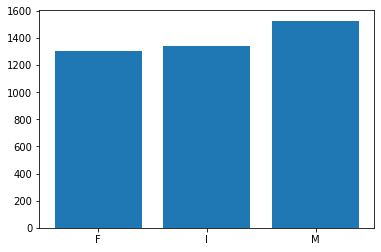

In [201]:
plt.bar([1, 2, 3], data.groupby("plec").size())
plt.xticks([1, 2, 3], data.groupby("plec").groups)
plt.show()

# Ocena dostateczna 4

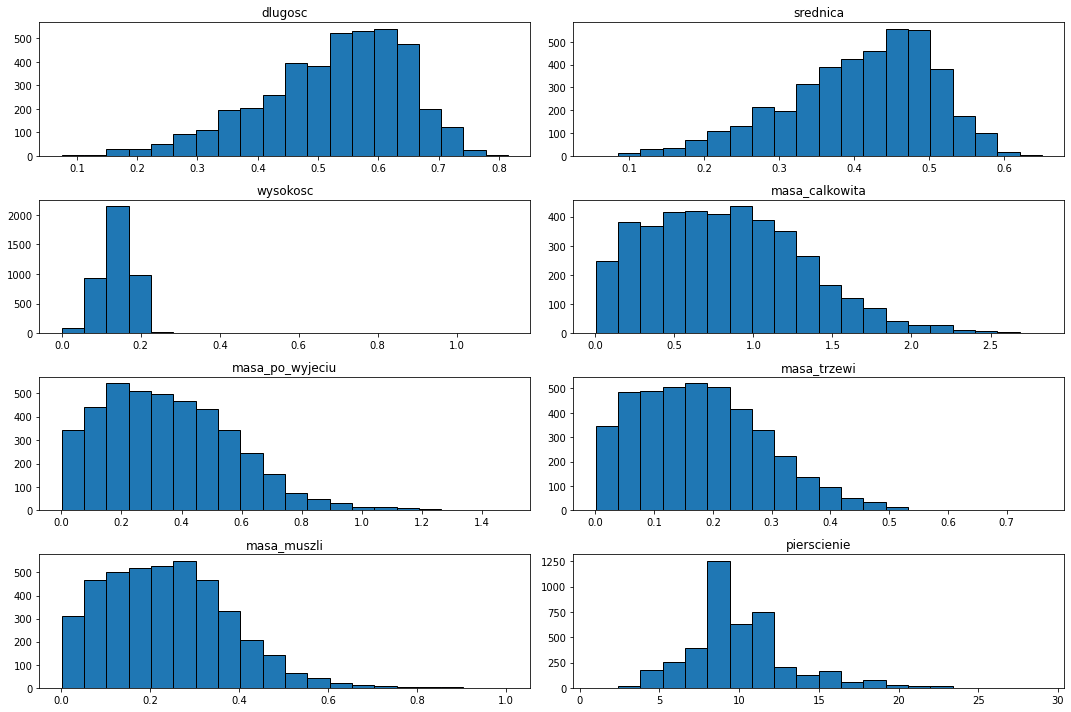

In [202]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
for column_name in data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]:
    plot = fig.add_subplot(4, 2, data.columns.get_loc(column_name), title=column_name)
    plot.hist(data[column_name], bins=20, edgecolor="black")

plt.tight_layout()
plt.show()

# Ocena dobra 2

In [ ]:
fig = plt.figure()
fig.set_figheight(40)
fig.set_figwidth(15)
pairs = list(combinations(data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]], 2))
for i in range(len(pairs)):
    plot = fig.add_subplot(14, 2, (i + 1), title=pairs[i][0] + " " + pairs[i][1])
    plot.scatter(data[pairs[i][0]], data[pairs[i][1]], edgecolor="black")
    plot.set_xlabel(pairs[i][0])
    plot.set_ylabel(pairs[i][1])

plt.tight_layout()
plt.show()

# Ocena dobra 3

In [ ]:
heatmap(data_without_sexes.corr())
print_table(data_without_sexes.corr())

# Ocena dobra 4

In [ ]:
regplot(x=data.columns[1], y=data.columns[2],  data=data.iloc[:, [1, 2]], color='b', line_kws={'color': 'r'})
print_table(data_without_sexes.corr())

# Ocena bardzo dobra 2

In [ ]:
data_set = data.groupby("plec").describe().stack(0).drop(columns='count')
additional_index = MultiIndex.from_product([data_without_sexes.columns, ["F", "I", "M"]], names=["cecha", "plec"])
data_set.index = additional_index
print(data_set.round(3))

# Ocena bardzo dobra 3

In [ ]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)
for column_name in data.iloc[:, [1, 2, 3, 4, 5, 6, 7, 8]]:
    plot = fig.add_subplot(4, 2, data.columns.get_loc(column_name), title=column_name)
    plot.boxplot(data[column_name])

plt.tight_layout()
plt.show()